In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Problem: Predict loan default risk for applicants.
Objective: Assist financial institutions in risk assessment.
Tasks:
Data Preprocessing
Model Building
Model Evaluation
Interpretability & Reporting


In [148]:
df1=pd.read_csv(r"D:\project 5\loan_default_prediction_project (1).csv")
df1.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


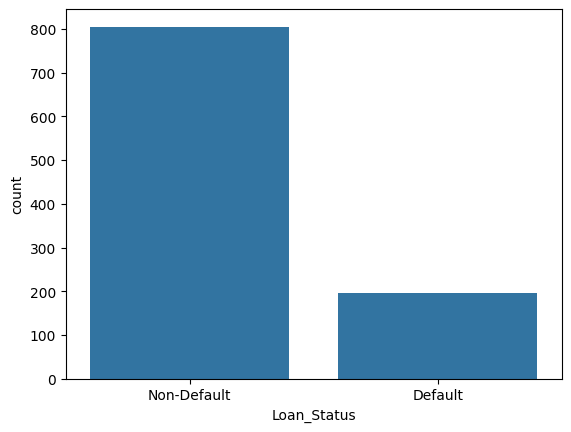

In [149]:
ax=sns.countplot(x='Loan_Status',data=df1)

In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [151]:
df1.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [152]:
num_cols=df1.select_dtypes(include=['int64','float64'])
cat_cols=df1.select_dtypes(include='object')

In [153]:
cols=list(cat_cols.columns)

In [154]:
for i in cols:
    print(df1[i].value_counts())
    print("                 ")

Gender
Female    399
Male      393
Name: count, dtype: int64
                 
Employment_Status
Employed      596
Unemployed    310
Name: count, dtype: int64
                 
Location
Rural       348
Suburban    344
Urban       308
Name: count, dtype: int64
                 
Loan_Status
Non-Default    805
Default        195
Name: count, dtype: int64
                 


In [156]:
#calculate ratio of male and female values
gender_ratio=df1['Gender'].value_counts(normalize=True)

#fill null values based on the ratio
null_count=df1['Gender'].isnull().sum()
null_indices=df1[df1['Gender'].isnull()].index

fill_values=np.random.choice(gender_ratio.index,size=null_count,p=gender_ratio.values)
df1.loc[null_indices,'Gender']=fill_values

In [157]:
df1.isnull().sum()

Age                       0
Gender                    0
Income                    0
Employment_Status        94
Location                  0
Credit_Score              0
Debt_to_Income_Ratio      0
Existing_Loan_Balance     0
Loan_Status               0
Loan_Amount               0
Interest_Rate             0
Loan_Duration_Months      0
dtype: int64

In [158]:
# Calculate the ratio of 'Employed' and 'Unemployed' values
employment_ratio = df1['Employment_Status'].value_counts(normalize=True)

# Fill null values based on the ratio
null_count = df1['Employment_Status'].isnull().sum()
null_indices = df1[df1['Employment_Status'].isnull()].index

fill_values = np.random.choice(employment_ratio.index, size=null_count, p=employment_ratio.values)
df1.loc[null_indices, 'Employment_Status'] = fill_values


In [159]:
df1.isnull().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

In [160]:
num_cols=df1.select_dtypes(include=['int64','float64'])
cat_cols=df1.select_dtypes(include='object')

In [161]:
one_hot_cols=pd.get_dummies(cat_cols)

In [162]:
one_hot_cols.columns

Index(['Gender_Female', 'Gender_Male', 'Employment_Status_Employed',
       'Employment_Status_Unemployed', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Loan_Status_Default', 'Loan_Status_Non-Default'],
      dtype='object')

In [163]:
one_hot_cols.shape

(1000, 9)

In [164]:
num_cols.shape

(1000, 8)

In [165]:
final_df=pd.concat([one_hot_cols,num_cols],axis=1)

In [166]:
final_df.head()

,Gender_Female,Gender_Male,Employment_Status_Employed,Employment_Status_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Loan_Status_Default,Loan_Status_Non-Default,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,False,True,True,False,False,True,False,False,True,56,71266.105175,639,0.007142,27060.188289,13068.330587,18.185533,59
1,False,True,True,False,False,True,False,True,False,46,37283.054601,474,0.456731,40192.994312,15159.338369,11.727471,69
2,False,True,True,False,False,False,True,True,False,32,69567.036392,750,0.329231,25444.262759,6131.287659,17.030462,69
3,True,False,True,False,True,False,False,False,True,60,72016.087392,435,0.052482,3122.213749,37531.880251,16.868949,26
4,True,False,False,True,False,True,False,False,True,25,32161.988250,315,0.450236,19197.350445,41466.397989,18.891582,66


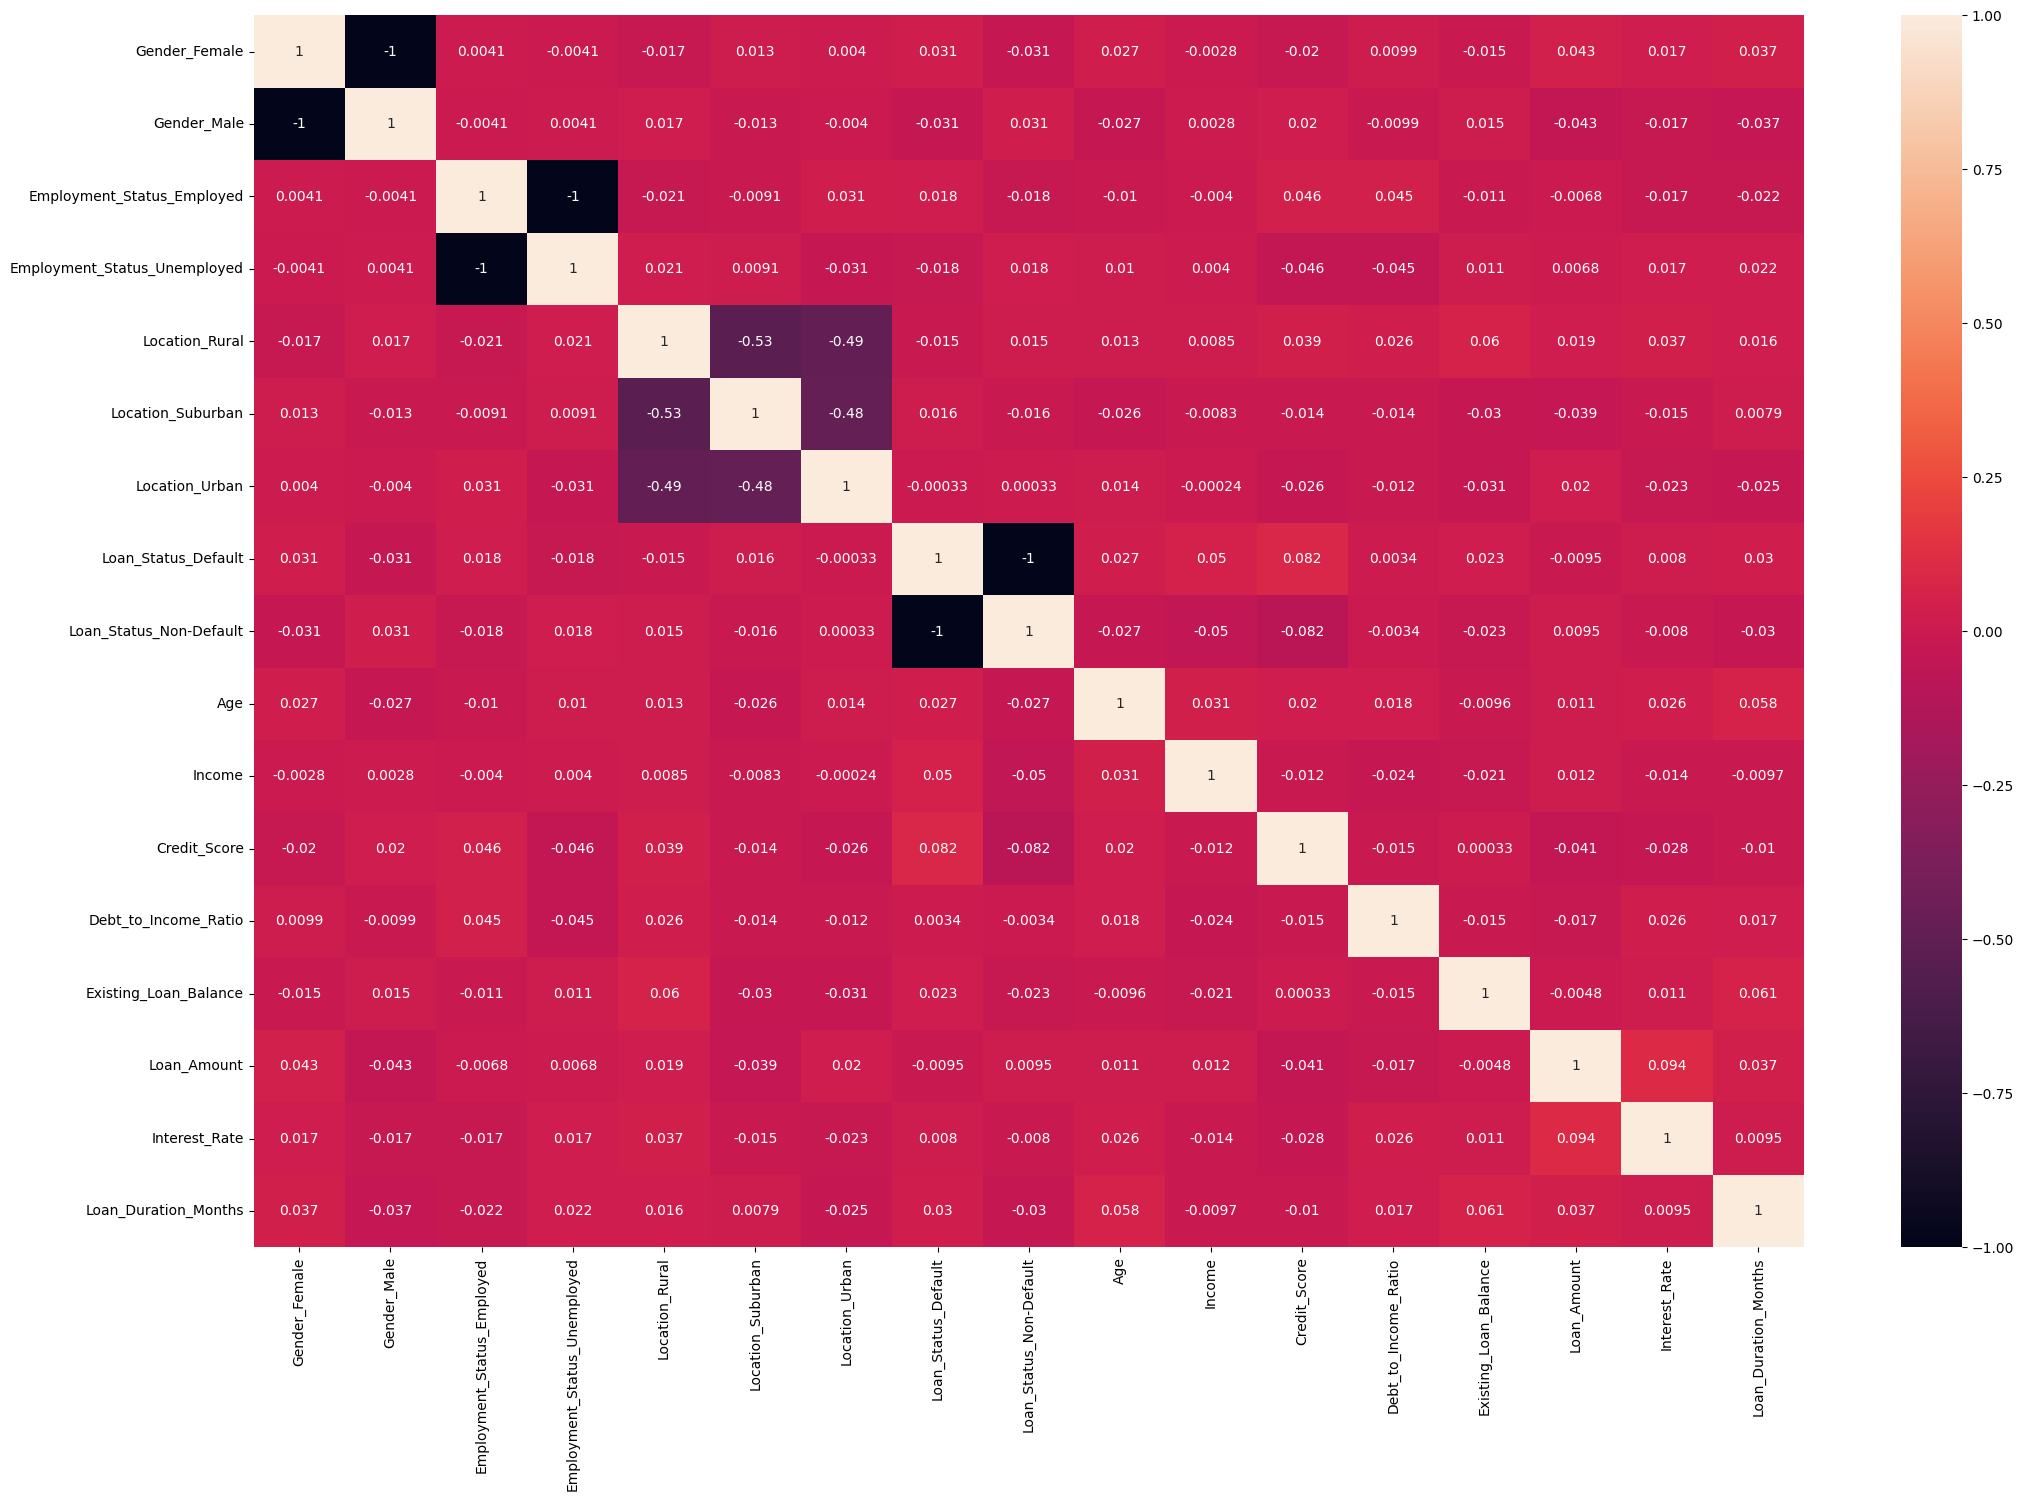

In [167]:
plt.figure(figsize=(25,16))
sns.heatmap(final_df.corr(),annot=True)
plt.show()

In [168]:
final_df.columns

Index(['Gender_Female', 'Gender_Male', 'Employment_Status_Employed',
       'Employment_Status_Unemployed', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Loan_Status_Default', 'Loan_Status_Non-Default',
       'Age', 'Income', 'Credit_Score', 'Debt_to_Income_Ratio',
       'Existing_Loan_Balance', 'Loan_Amount', 'Interest_Rate',
       'Loan_Duration_Months'],
      dtype='object')

In [169]:
X=final_df.drop(columns=['Loan_Status_Default','Loan_Status_Non-Default'])

In [170]:
y=final_df['Loan_Status_Default']

In [171]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [172]:
y.value_counts()

Loan_Status_Default
False    805
True     195
Name: count, dtype: int64

In [173]:
y_resampled.value_counts()

Loan_Status_Default
False    805
True     805
Name: count, dtype: int64

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

[[131 146]
 [ 78 177]]
              precision    recall  f1-score   support

       False       0.63      0.47      0.54       277
        True       0.55      0.69      0.61       255

    accuracy                           0.58       532
   macro avg       0.59      0.58      0.58       532
weighted avg       0.59      0.58      0.57       532



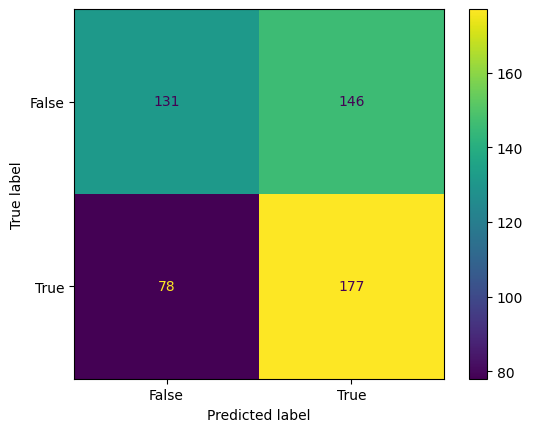

In [175]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

[[261  16]
 [ 43 212]]
--------------------------
              precision    recall  f1-score   support

       False       0.86      0.94      0.90       277
        True       0.93      0.83      0.88       255

    accuracy                           0.89       532
   macro avg       0.89      0.89      0.89       532
weighted avg       0.89      0.89      0.89       532

---------------------------


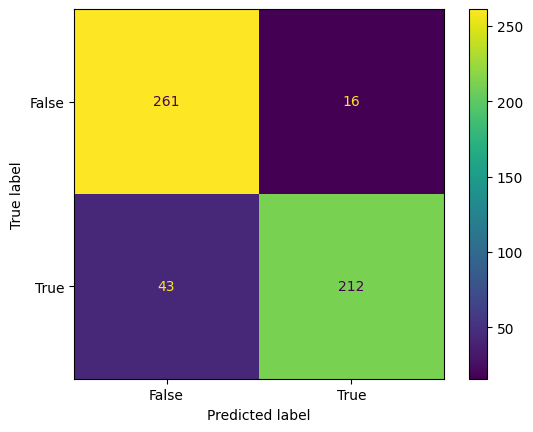

In [176]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [177]:
param_grid={
    'n_estimators':[100,200,300],
    'criterion' :['gini', 'entropy'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]
    
}

grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,n_jobs=-1)
grid_search.fit(X_train,y_train)

print("Best patrameters:",grid_search.best_params_)

Best patrameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


[[260  17]
 [ 43 212]]
--------------------------
              precision    recall  f1-score   support

       False       0.86      0.94      0.90       277
        True       0.93      0.83      0.88       255

    accuracy                           0.89       532
   macro avg       0.89      0.89      0.89       532
weighted avg       0.89      0.89      0.89       532

---------------------------


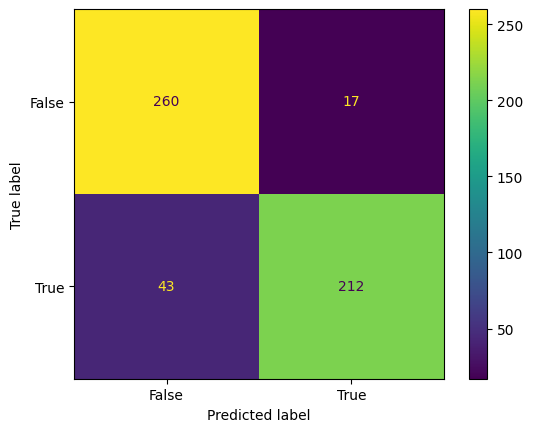

In [178]:
rfc=RandomForestClassifier(criterion='gini',bootstrap= True, max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [179]:
from xgboost import XGBClassifier


[[249  15]
 [ 57   9]]
--------------------------
              precision    recall  f1-score   support

       False       0.81      0.94      0.87       264
        True       0.38      0.14      0.20        66

    accuracy                           0.78       330
   macro avg       0.59      0.54      0.54       330
weighted avg       0.73      0.78      0.74       330

---------------------------


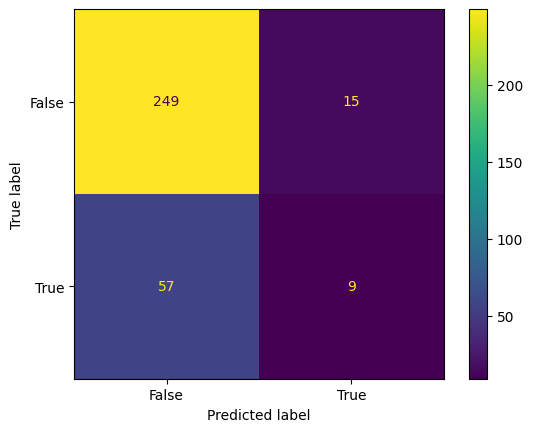

In [206]:
# create model instance
bst = XGBClassifier()
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

print(confusion_matrix(y_test,preds))
print('--------------------------')
print(classification_report(y_test,preds))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,preds)
plt.show()

In [181]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.3],
    'gamma':[0,0.1,0.3],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0],
    'objective':['binary:logistic']
}

bst=XGBClassifier()

grid_search=GridSearchCV(estimator=bst,param_grid=param_grid,cv=3,n_jobs=-1)
grid_search.fit(X_train,y_train)

print("best parameters:",grid_search.best_params_)

best parameters: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 1.0}


[[246  31]
 [ 45 210]]
--------------------------
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       277
        True       0.87      0.82      0.85       255

    accuracy                           0.86       532
   macro avg       0.86      0.86      0.86       532
weighted avg       0.86      0.86      0.86       532

---------------------------


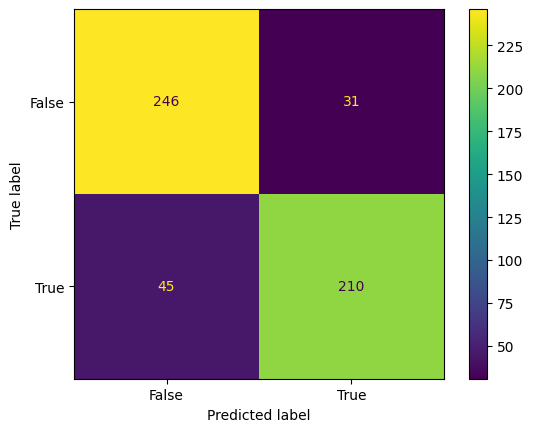

In [182]:
# create model instance
bst = XGBClassifier(colsample_bytree=  0.8, gamma= 0.3,learning_rate= 0.3, max_depth= 7, n_estimators= 100, objective= 'binary:logistic', subsample= 1.0)
# fit model
bst.fit(X_train, y_train)
# make predictions
preds1 = bst.predict(X_test)

print(confusion_matrix(y_test,preds1))
print('--------------------------')
print(classification_report(y_test,preds1))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,preds1)
plt.show()

RFC

[[260  17]
 [ 43 212]]
--------------------------
              precision    recall  f1-score   support

       False       0.86      0.94      0.90       277
        True       0.93      0.83      0.88       255

    accuracy                           0.89       532
   macro avg       0.89      0.89      0.89       532
weighted avg       0.89      0.89      0.89       532

XGBoost

[[246  31]
 [ 45 210]]
--------------------------
              precision    recall  f1-score   support

       False       0.85      0.89      0.87       277
        True       0.87      0.82      0.85       255

    accuracy                           0.86       532
   macro avg       0.86      0.86      0.86       532
weighted avg       0.86      0.86      0.86       532

In [183]:
import time

import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


In [184]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [185]:
len(X.columns)

15

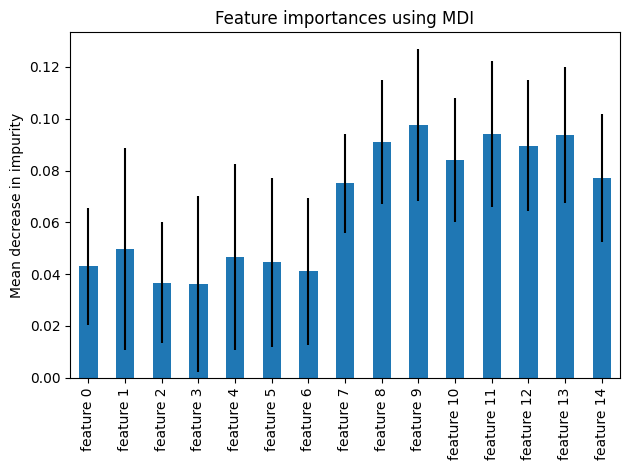

In [186]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [187]:
X.columns

Index(['Gender_Female', 'Gender_Male', 'Employment_Status_Employed',
       'Employment_Status_Unemployed', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Age', 'Income', 'Credit_Score',
       'Debt_to_Income_Ratio', 'Existing_Loan_Balance', 'Loan_Amount',
       'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

<Axes: >

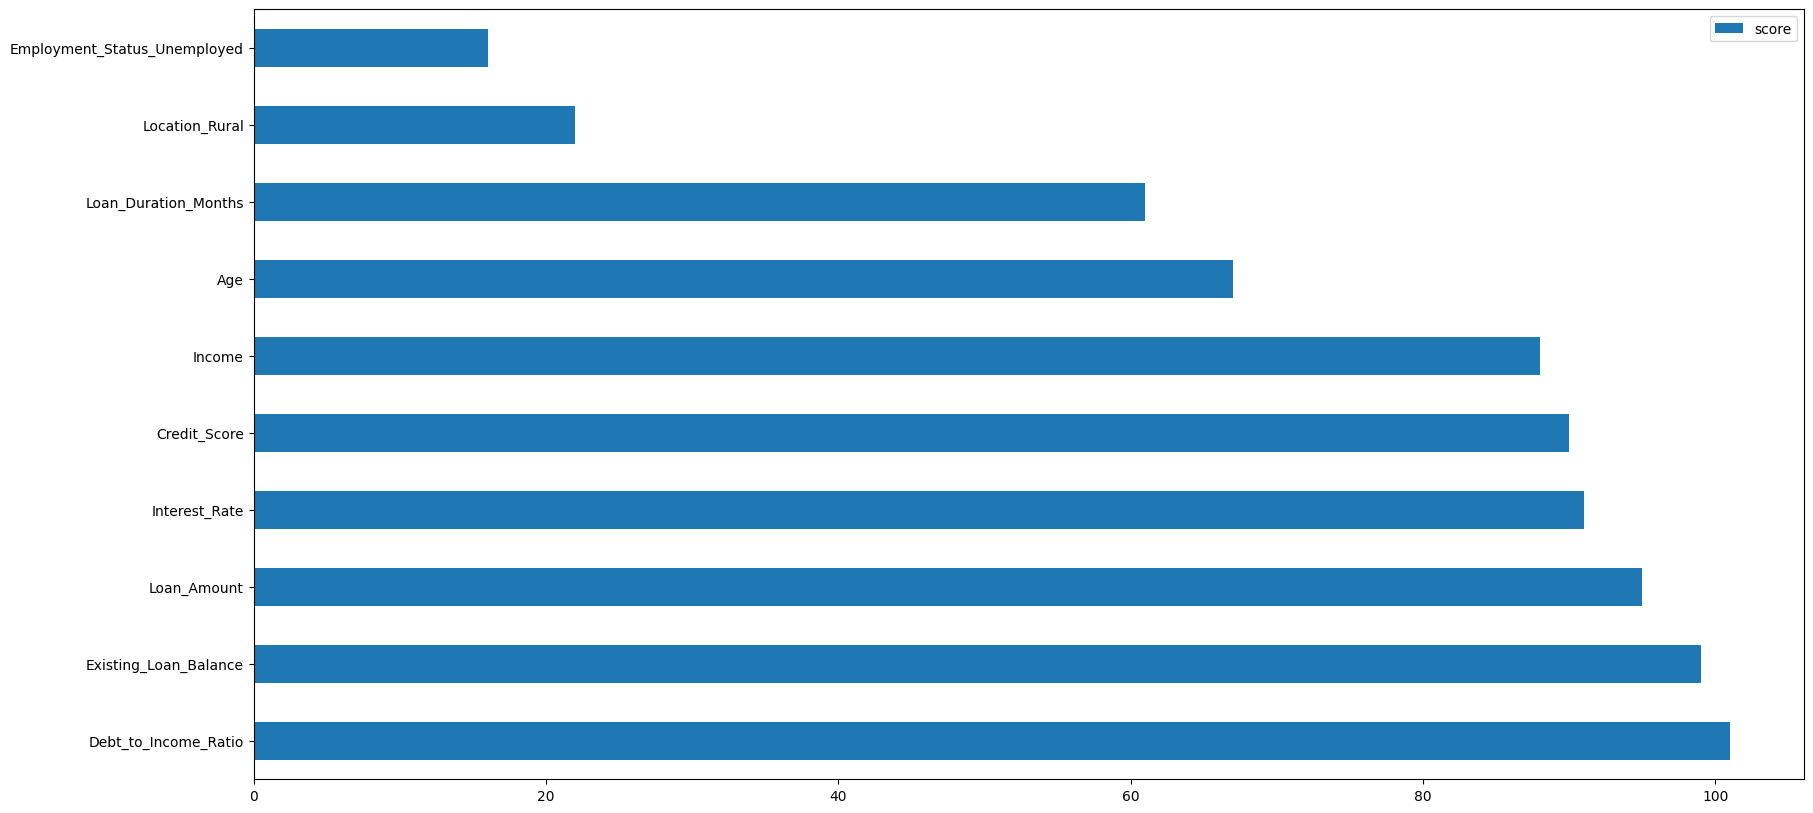

In [188]:
feature_important = bst.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [190]:
import warnings
warnings.filterwarnings('ignore')

In [191]:
X.columns

Index(['Gender_Female', 'Gender_Male', 'Employment_Status_Employed',
       'Employment_Status_Unemployed', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Age', 'Income', 'Credit_Score',
       'Debt_to_Income_Ratio', 'Existing_Loan_Balance', 'Loan_Amount',
       'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

In [192]:
sfs1=SFS(RandomForestRegressor(),
         k_features=15,
         forward=True,
         floating=False,
         verbose=2,
         scoring='r2',
         cv=3)

sfs1=sfs1.fit(np.array(X_train),y_train)


[2024-05-05 11:43:42] Features: 1/15 -- score: 0.047115088099938585
[2024-05-05 11:43:46] Features: 2/15 -- score: 0.20889589456717225
[2024-05-05 11:43:51] Features: 3/15 -- score: 0.23267242675154876
[2024-05-05 11:43:55] Features: 4/15 -- score: 0.3386983139882775
[2024-05-05 11:43:59] Features: 5/15 -- score: 0.35089976565699016
[2024-05-05 11:44:04] Features: 6/15 -- score: 0.39309719041724583
[2024-05-05 11:44:07] Features: 7/15 -- score: 0.49226006970520647
[2024-05-05 11:44:11] Features: 8/15 -- score: 0.38981964148463
[2024-05-05 11:44:14] Features: 9/15 -- score: 0.46539087089830194
[2024-05-05 11:44:18] Features: 10/15 -- score: 0.4958212891539772
[2024-05-05 11:44:21] Features: 11/15 -- score: 0.511789238638393
[2024-05-05 11:44:25] Features: 12/15 -- score: 0.511163367103038
[2024-05-05 11:44:27] Features: 13/15 -- score: 0.5208075694574018
[2024-05-05 11:44:29] Features: 14/15 -- score: 0.5036651669367868
[2024-05-05 11:44:30] Features: 15/15 -- score: 0.5135346490082625

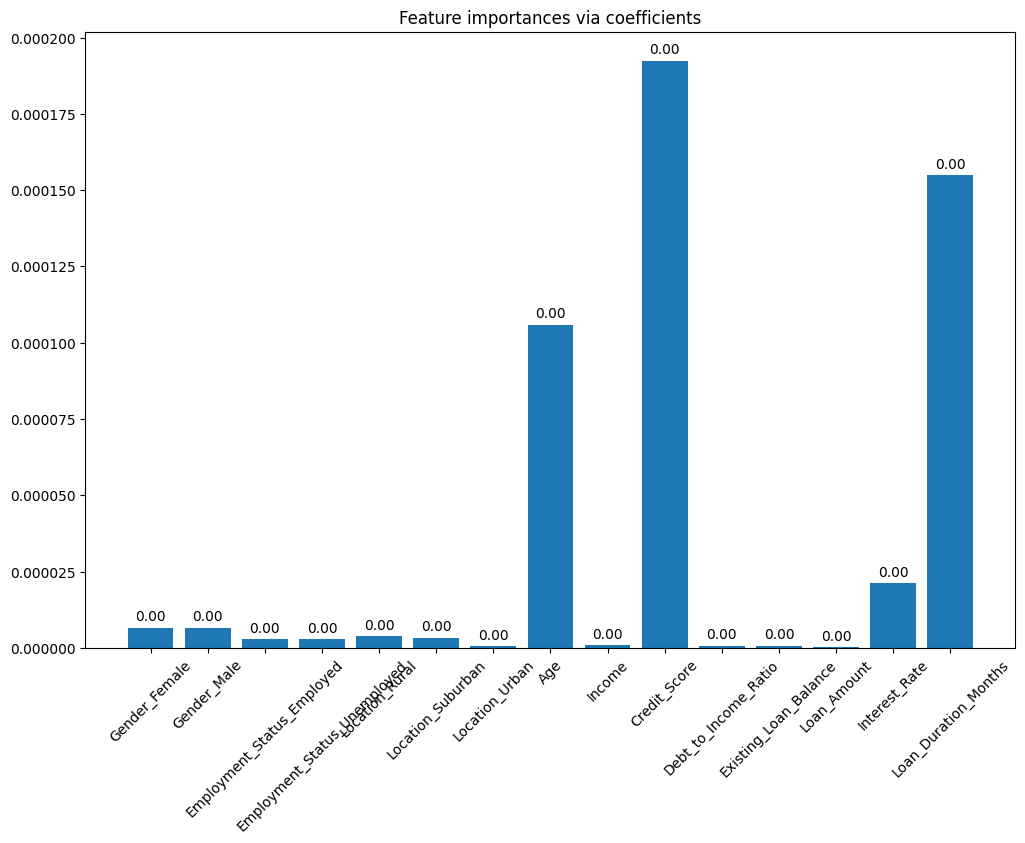

In [193]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)

plt.figure(figsize=(12, 8))  # Set the figure size to 12x8
bars = plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add annotations for each bar
for bar, importance_value in zip(bars, importance):
    plt.annotate(f"{importance_value:.2f}", 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


In [194]:
X.columns

Index(['Gender_Female', 'Gender_Male', 'Employment_Status_Employed',
       'Employment_Status_Unemployed', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Age', 'Income', 'Credit_Score',
       'Debt_to_Income_Ratio', 'Existing_Loan_Balance', 'Loan_Amount',
       'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

In [195]:
from time import time


In [204]:
from sklearn.feature_selection import SequentialFeatureSelector
tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    estimator=ridge, n_features_to_select=13, direction="backward"
).fit(X, y)
toc_bwd = time()
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")


Features selected by backward sequential selection: ['Gender_Female' 'Gender_Male' 'Employment_Status_Employed'
 'Employment_Status_Unemployed' 'Location_Rural' 'Location_Suburban'
 'Location_Urban' 'Age' 'Credit_Score' 'Debt_to_Income_Ratio'
 'Loan_Amount' 'Interest_Rate' 'Loan_Duration_Months']
Done in 0.854s


In [199]:
selected_columns = ['Gender_Female' ,'Gender_Male', 'Employment_Status_Employed',
 'Employment_Status_Unemployed' ,'Location_Rural' ,'Location_Suburban',
 'Location_Urban', 'Age', 'Credit_Score' ,'Debt_to_Income_Ratio',
 'Loan_Amount' ,'Interest_Rate' ,'Loan_Duration_Months']

df1 = final_df[selected_columns].copy()


In [200]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.33, random_state=42)

[[264   0]
 [ 66   0]]
              precision    recall  f1-score   support

       False       0.80      1.00      0.89       264
        True       0.00      0.00      0.00        66

    accuracy                           0.80       330
   macro avg       0.40      0.50      0.44       330
weighted avg       0.64      0.80      0.71       330



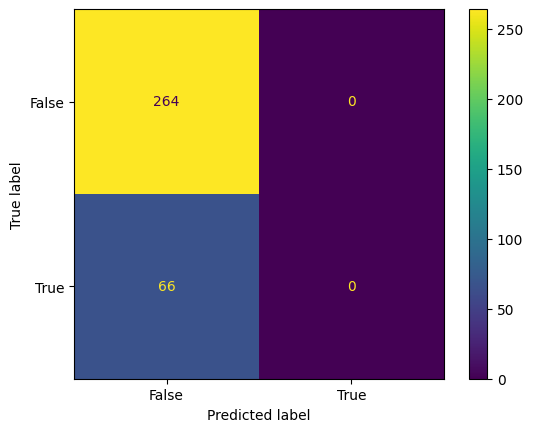

In [201]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

[[263   1]
 [ 65   1]]
--------------------------
              precision    recall  f1-score   support

       False       0.80      1.00      0.89       264
        True       0.50      0.02      0.03        66

    accuracy                           0.80       330
   macro avg       0.65      0.51      0.46       330
weighted avg       0.74      0.80      0.72       330

---------------------------


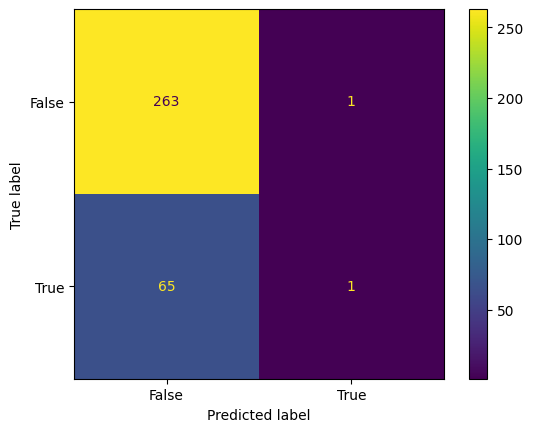

In [202]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [205]:
param_grid={
    'n_estimators':[100,200,300],
    'criterion' :['gini', 'entropy'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]
    
}

grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,n_jobs=-1)
grid_search.fit(X_train,y_train)

print("Best patrameters:",grid_search.best_params_)

Best patrameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


[[261   3]
 [ 64   2]]
--------------------------
              precision    recall  f1-score   support

       False       0.80      0.99      0.89       264
        True       0.40      0.03      0.06        66

    accuracy                           0.80       330
   macro avg       0.60      0.51      0.47       330
weighted avg       0.72      0.80      0.72       330

---------------------------


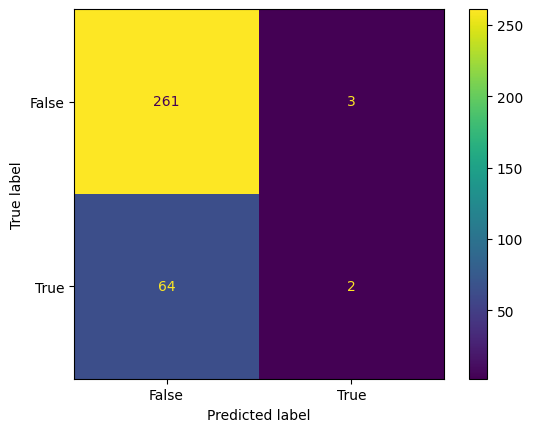

In [207]:
rfc=RandomForestClassifier(criterion='gini',bootstrap= False, max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

[[250  14]
 [ 57   9]]
--------------------------
              precision    recall  f1-score   support

       False       0.81      0.95      0.88       264
        True       0.39      0.14      0.20        66

    accuracy                           0.78       330
   macro avg       0.60      0.54      0.54       330
weighted avg       0.73      0.78      0.74       330

---------------------------


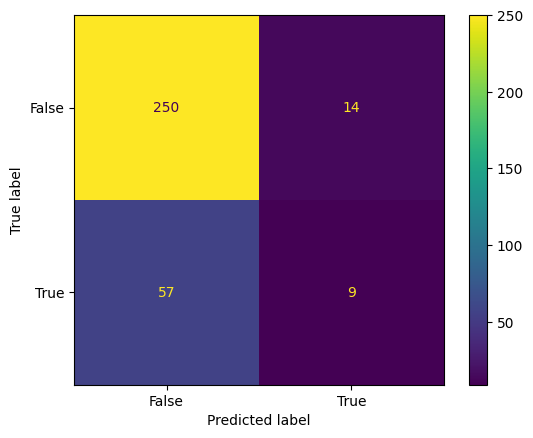

In [203]:
# create model instance
bst = XGBClassifier(colsample_bytree= 0.8, gamma= 0,learning_rate= 0.3, max_depth= 3, n_estimators= 100, objective= 'binary:logistic', subsample= 0.8)
# fit model
bst.fit(X_train, y_train)
# make predictions
preds1 = bst.predict(X_test)

print(confusion_matrix(y_test,preds1))
print('--------------------------')
print(classification_report(y_test,preds1))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,preds1)
plt.show()